In [15]:
#https://ieee-dataport.org/open-access/indian-diabetic-retinopathy-image-dataset-idrid
!ls retina/*A*/*O*/*Train*
import os
from glob import glob
imgs = glob(os.path.join('retina/*A*/*O*/*Train*', "*.jpg"))
imgs[2]

IDRiD_01.jpg  IDRiD_12.jpg  IDRiD_23.jpg  IDRiD_34.jpg	IDRiD_45.jpg
IDRiD_02.jpg  IDRiD_13.jpg  IDRiD_24.jpg  IDRiD_35.jpg	IDRiD_46.jpg
IDRiD_03.jpg  IDRiD_14.jpg  IDRiD_25.jpg  IDRiD_36.jpg	IDRiD_47.jpg
IDRiD_04.jpg  IDRiD_15.jpg  IDRiD_26.jpg  IDRiD_37.jpg	IDRiD_48.jpg
IDRiD_05.jpg  IDRiD_16.jpg  IDRiD_27.jpg  IDRiD_38.jpg	IDRiD_49.jpg
IDRiD_06.jpg  IDRiD_17.jpg  IDRiD_28.jpg  IDRiD_39.jpg	IDRiD_50.jpg
IDRiD_07.jpg  IDRiD_18.jpg  IDRiD_29.jpg  IDRiD_40.jpg	IDRiD_51.jpg
IDRiD_08.jpg  IDRiD_19.jpg  IDRiD_30.jpg  IDRiD_41.jpg	IDRiD_52.jpg
IDRiD_09.jpg  IDRiD_20.jpg  IDRiD_31.jpg  IDRiD_42.jpg	IDRiD_53.jpg
IDRiD_10.jpg  IDRiD_21.jpg  IDRiD_32.jpg  IDRiD_43.jpg	IDRiD_54.jpg
IDRiD_11.jpg  IDRiD_22.jpg  IDRiD_33.jpg  IDRiD_44.jpg


'retina/A. Segmentation/1. Original Images/a. Training Set/IDRiD_52.jpg'

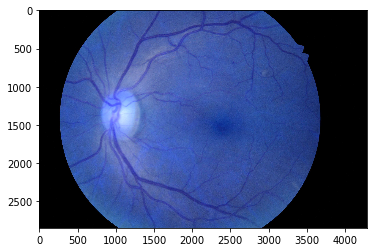

In [19]:
import cv2
import matplotlib.pylab as plt
cvimg = cv2.imread(imgs[2],1)
plt.imshow(cvimg)

In [14]:
#https://github.com/fastai/fastai/blob/master/courses/dl2/carvana-unet-lrg.ipynb
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from fastai.conv_learner import *
from fastai.dataset import *
from fastai.models.resnet import vgg_resnet50
import json
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax
PATH = Path('retina/*B*/*G*')
MASKS = '*Training*.csv'
META = '*metadata*.csv'
masks_csv = pd.read_csv(PATH/MASKS)
#meta_csv = pd.read_csv("retina/*/*/META")

FileNotFoundError: File b'retina/*B*/*G*/*Training*.csv' does not exist

In [20]:
def plot_ds_img(idx, ax=None, figsize=(7,7), normed=True):
    if ax is None: fig,ax = plt.subplots(figsize=figsize)
    im = md.val_ds[idx][0]
    if normed: im = denorm(im)[0]
    else:      im = np.rollaxis(to_np(im),0,3)
    ax.imshow(im)
    ax.axis('off')

In [29]:
md = ImageData(PATH, imgs[1:7], 6, num_workers=16, classes=None)

TypeError: string indices must be integers

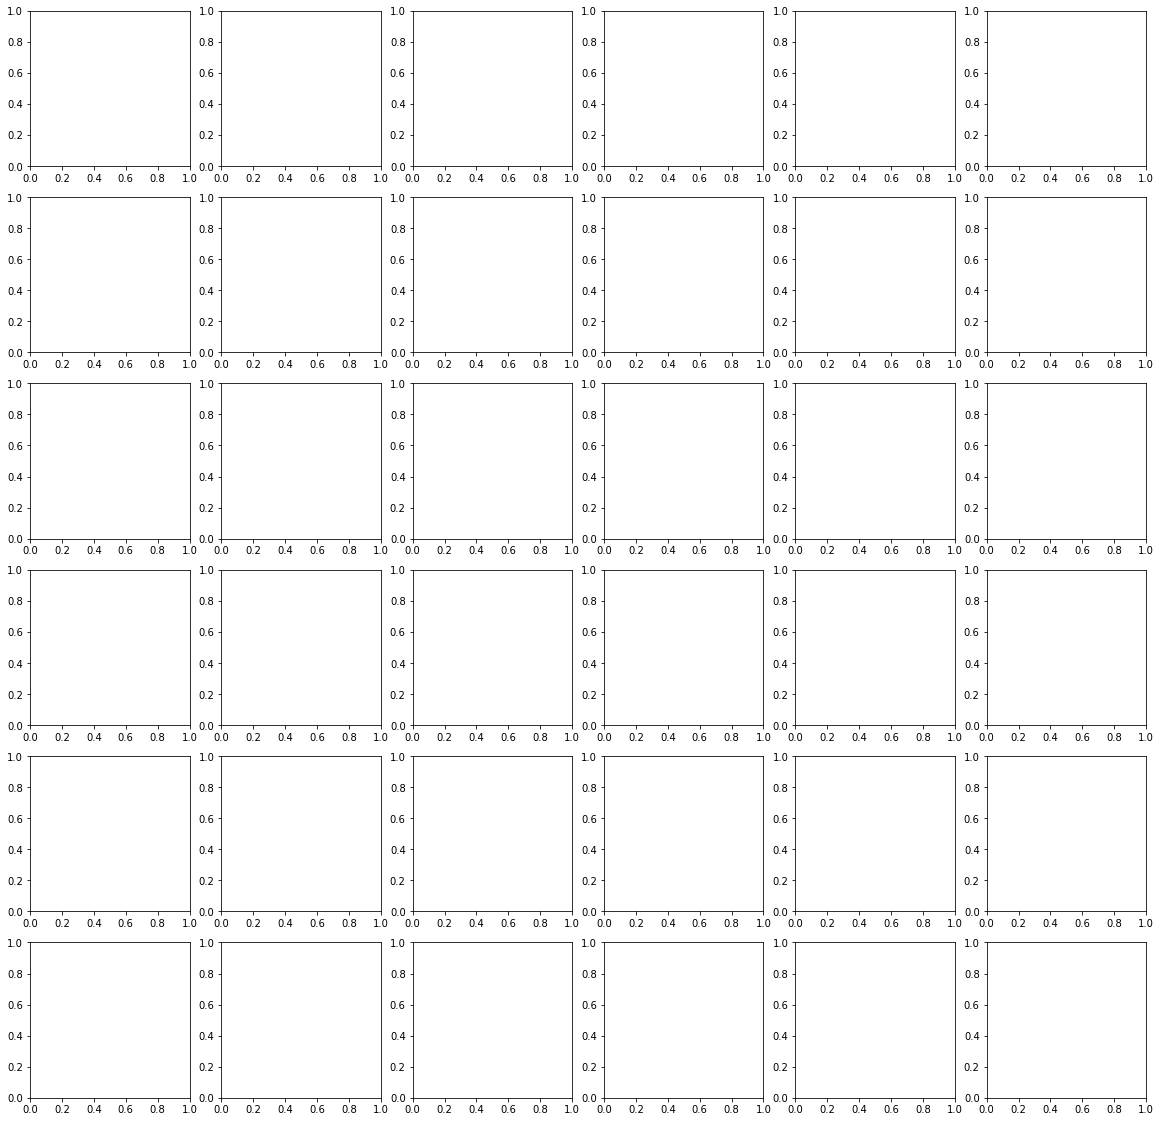

In [30]:
fig,axes=plt.subplots(6,6,figsize=(20,20))
for i,ax in enumerate(axes.flat): plot_ds_img(imgs[i],ax=ax, normed=True)

In [52]:
!pip install lime

    100% |████████████████████████████████| 266kB 1.3MB/s ta 0:00:011
  Running setup.py bdist_wheel for lime ... done
  Stored in directory: /home/notebook/.cache/pip/wheels/b8/84/64/feaa6a3aef72109356c4e2be30eef7db76c49d43690eeef113
Successfully built lime
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [53]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 153kB 1.9MB/s ta 0:00:01
    100% |████████████████████████████████| 4.9MB 135kB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 48kB/s  eta 0:00:01   33% |██████████▉                     | 4.7MB 45.7MB/s eta 0:00:01
Requirement already up-to-date: scipy in /home/notebook/.local/lib/python3.6/site-packages (from imbalanced-learn)
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
  Found existing installation: numpy 1.14.4
    Uninstalling numpy-1.14.4:
      Successfully uninstalled numpy-1.14.4
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
!conda install numpy zeromq pyzmq

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.5.9

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs: 
    - numpy
    - pyzmq
    - zeromq


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2o             |       h470a237_1         3.5 MB  conda-forge
    zeromq-4.2.5               |       hfc679d8_5         939 KB  conda-forge
    pyzmq-17.1.0               |   py36hae99301_0         1.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.5 MB

The following packages will be UPDATED:

    openssl: 1.0.2o-0      conda-forge --> 1.0.2o-h470a237_1     conda-forge
    pyzmq:   17.0.0-py36_4 conda-forge --> 17.1.0-py36ha

In [ ]:
https://github.com/pytorch/ELF 

In [1]:
!pip install torch  --upgrade

Requirement already up-to-date: torch in /opt/conda/lib/python3.6/site-packages
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [77]:
!pip install talos

  Using cached https://files.pythonhosted.org/packages/99/f5/828994447fee3dfa6f2fa33f6bb294afd27acddc8e90bbd9cb70f156b8db/talos-0.1.9.tar.gz
    Complete output from command python setup.py egg_info:
    /opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
      from ._conv import register_converters as _register_converters
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-10c8w8bq/talos/setup.py", line 57, in <module>
        install_requires = check_dependencies()
      File "/tmp/pip-install-10c8w8bq/talos/setup.py", line 44, in check_dependencies
        import keras
      File "/opt/conda/lib/python3.6/site-packages/keras/__init__.py", line 2, in <module>
        from . import backend
      File "/opt/conda/lib/python3.6/site-packages/ker

In [ ]:
import torch
print("#GPU-", torch.cuda.device_count())

In [81]:
from torch.utils.data import Dataset, DataLoader
ip_s = 500000
op_s = 5000
bat_s = 1000
data_s = 10000
class randDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
    def __getitem__(self, index):
        return self.data[index]
    def __len__(self):
        return self.len
rand_loader = DataLoader(randDataset(ip_s, data_s), bat_s, shuffle=True)
rand_loader

In [80]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self, ip_s, op_s):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(ip_s, int((ip_s+op_s)/2))
        self.fc2 = nn.Linear(int((ip_s+op_s)/2), op_s)
    def forward(self, input):
        output = self.fc1(input)
        output = self.fc2(output)
        print("\tFCN: input", input.size(),"output", output.size())
        return output
two_layer_nn = FCN(ip_s, op_s).cuda()
two_layer_nn = nn.DataParallel(two_layer_nn)
for data in rand_loader:
    input = data
    output = two_layer_nn(input)
    print("input", input.size(),"output", output.size())

/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:24: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


	FCN: input torch.Size([50, 50000])	FCN: input torch.Size([50, 50000]) output output torch.Size([50, 500])
 torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
	FCN: input torch.Size([50, 50000]) output torch.Size([50, 500])
input torch.Size([100, 50000]) output torch.Size([100, 500])
	FCN: input torch.Size([50, 50000]) output to

In [5]:
!pip install numpy mpi4py

    100% |████████████████████████████████| 1.4MB 655kB/s 
  Running setup.py bdist_wheel for mpi4py ... error
  Complete output from command /opt/conda/bin/python -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-hocptu_o/mpi4py/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmps4ardv0tpip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_src
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.6
  creating build/lib.linux-x86_64-3.6/mpi4py
  copying src/mpi4py/__init__.py -> build/lib.linux-x86_64-3.6/mpi4py
  copying src/mpi4py/__main__.py -> build/lib.linux-x86_64-3.6/mpi4py
  copying src/mpi4py/run.py -> build/lib.linux-x86_64-3.6/mpi4py
  copying src/mpi4py/bench.py -> build/lib.linux-x86_64-3.6/mpi4py
  creating build/lib.linux-x86_64-3.6/mpi4py/futures
  copying src/mpi4py/futures/_lib.py -> build/lib.linux-x8

In [7]:
!pip install petsc4py

  Using cached https://files.pythonhosted.org/packages/91/8c/2c5d593b5dc7aff46bd56b7c71fc5550bd342c8295440eb8c9cb255f2e71/petsc4py-3.9.1.tar.gz
    Complete output from command python setup.py egg_info:
    running egg_info
    creating pip-egg-info/petsc4py.egg-info
    writing pip-egg-info/petsc4py.egg-info/PKG-INFO
    writing dependency_links to pip-egg-info/petsc4py.egg-info/dependency_links.txt
    writing requirements to pip-egg-info/petsc4py.egg-info/requires.txt
    writing top-level names to pip-egg-info/petsc4py.egg-info/top_level.txt
    writing manifest file 'pip-egg-info/petsc4py.egg-info/SOURCES.txt'
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-wmv2d06l/petsc4py/setup.py", line 267, in <module>
        main()
      File "/tmp/pip-install-wmv2d06l/petsc4py/setup.py", line 264, in main
        run_setup()
      File "/tmp/pip-install-wmv2d06l/petsc4py/setup.py", line 137, in run_setup
        **setup_args)
 

In [564]:
!pip install problog  

    100% |████████████████████████████████| 1.1MB 5.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for problog ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/a8/71/e2/0870fd5958fd64dde4a143b97dedefe91d9fd0796845457c2e
Successfully built problog
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


In [572]:
!pip install pyro-ppl

    100% |████████████████████████████████| 102kB 2.2MB/s a 0:00:01
    100% |████████████████████████████████| 1.6MB 6.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyro-ppl ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/25/50/79/a888f0784f0409b6296e4b5aa82795a63a4cf61d6864f9f095
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/44/c0/34/6f98693a554301bdb405f8d65d95bbcd3e50180cbfdd98a94e
Successfully built pyro-ppl networkx
  Found existing installation: networkx 1.11
    Uninstalling networkx-1.11:
      Successfully uninstalled networkx-1.11


In [569]:
!pip install tensorflow --upgrade

    100% |████████████████████████████████| 49.1MB 705kB/s eta 0:00:01  4% |█▍                              | 2.1MB 9.8MB/s eta 0:00:05    11% |███▊                            | 5.6MB 11.5MB/s eta 0:00:04    16% |█████▏                          | 8.0MB 10.3MB/s eta 0:00:04    18% |██████                          | 9.2MB 11.2MB/s eta 0:00:04    32% |██████████▍                     | 16.0MB 11.6MB/s eta 0:00:03    70% |██████████████████████▋         | 34.7MB 18.9MB/s eta 0:00:01    78% |█████████████████████████       | 38.3MB 14.1MB/s eta 0:00:01    90% |████████████████████████████▉   | 44.2MB 16.5MB/s eta 0:00:01
    100% |████████████████████████████████| 8.8MB 3.4MB/s eta 0:00:01    30% |█████████▊                      | 2.7MB 19.4MB/s eta 0:00:01
Requirement not upgraded as not directly required: wheel>=0.26 in /opt/conda/lib/python3.6/site-packages (from tensorflow) (0.30.0)
Requirement not upgraded as not directly required: six>=1.10.0 in /opt/conda/lib/python3.6/site-packages (

In [76]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self,n,o):
        super().__init__()
        self.fc1=nn.Linear(n,int(n/2))
        self.fc2=nn.Linear(int(n/2),o)
    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2(x)
        return x  

In [77]:
from torch.utils.data import DataLoader
n=64
o=1
bs=int(n/8)
ip=(torch.randn(n).cuda())
#print("ip",ip)
rand_loader = DataLoader(ip,batch_size=bs, shuffle=False)
for data in rand_loader:
    two_layer_nn=nn.DataParallel(FCN(data.size()[0],o).cuda())
    op=two_layer_nn(data)
    print("batch",two_layer_nn)    

/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:24: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


RuntimeError: size mismatch, m1: [1 x 4], m2: [8 x 4] at /opt/conda/conda-bld/pytorch_1525909934016/work/aten/src/THC/generic/THCTensorMathBlas.cu:249

In [16]:
n=64
o=4
torch.manual_seed(n)
ip = (torch.randn(n)).cuda()
two_layer_nn=nn.DataParallel(FCN(n,o).cuda()) # not working!
two_layer_nn=FCN(n,o).cuda()
op=two_layer_nn(ip)
op

	FCN: input torch.Size([64]) output torch.Size([4])


/opt/conda/lib/python3.6/site-packages/torch/nn/parallel/data_parallel.py:24: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 0 which
    has less than 75% of the memory or cores of GPU 1. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


tensor([ 0.4660,  0.0261,  0.0273, -0.4706], device='cuda:0')

In [1]:
import torch.nn
rng=1
input1 = torch.rand(64*rng, 3*rng, 128*rng, 128*rng).cuda()
input2 = torch.Tensor(64*rng, 3*rng, 128*rng, 128*rng).uniform_(-1, 1).cuda()
input1 = torch.autograd.Variable(input1, requires_grad=True)
input2 = torch.autograd.Variable(input2, requires_grad=True)
#expected = torch.mul(input1, input2)
expected = input1 - input2
expected.mean()

tensor(0.5001, device='cuda:0')

In [12]:
# imports
import torch # do not run this line after instantiating TorchClient
import torch.nn as nn
from torch.autograd import Variable
from grid.clients.torch import TorchClient
import numpy as np
import re

# instantiate client!
client = TorchClient(verbose=False)

ModuleNotFoundError: No module named 'grid'

In [340]:
!pip install gym

    100% |████████████████████████████████| 1.5MB 5.8MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 7.2MB/s ta 0:00:011    24% |███████▊                        | 245kB 7.6MB/s eta 0:00:01
  Running setup.py bdist_wheel for gym ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/cb/14/71/f4ab006b1e6ff75c2b54985c2f98d0644fffe9c1dddc670925
Successfully built gym
tensorflow 1.4.1 requires enum34>=1.1.6, which is not installed.
tensorflow 1.4.1 has requirement tensorflow-tensorboard<0.5.0,>=0.4.0rc1, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


In [343]:
import  gym
env  =  gym.make()
for i_episode in xrange(20):
    observation = env.reset()
    for t in xrange(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

TypeError: make() missing 1 required positional argument: 'id'

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn import datasets
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)
# load pima price dataset
dataset = datasets.load_boston()
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "/home/notebook/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/notebook/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/notebook/.local/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/opt/conda/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/opt/conda/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcuda.so.1: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

# filetered dataset via https://github.com/animesh/CheXNet fork

In [7]:
import os
from glob import glob
imgs = glob(os.path.join('./CheXNet/ChestX-ray14/images/', "*.png"))
imgs[2]

'./CheXNet/ChestX-ray14/images/00009232_001.png'

In [70]:
#pip install --upgrade pip
!pip install opencv-python

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


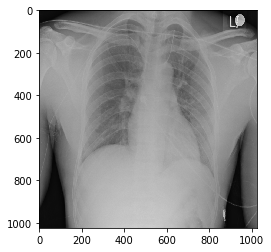

In [8]:
import cv2
import matplotlib.pylab as plt
cvimg = cv2.imread(imgs[2000],1)
plt.imshow(cvimg)

In [9]:
import numpy as np
%time Xrays256 = np.array([cv2.resize(cv2.imread(img,0), (256, 256), interpolation = cv2.INTER_AREA)/255 for img in imgs[:]])

CPU times: user 7min 33s, sys: 10.4 s, total: 7min 44s
Wall time: 14min 7s


In [4]:
import cupy as cp
%time Xrays256 = cp.array([cv2.resize(cv2.imread(img,0), (256, 256), interpolation = cv2.INTER_AREA)/255 for img in imgs[:]])


ModuleNotFoundError: No module named 'cupy'

In [2]:
Xrays256.shape

NameError: name 'Xrays256' is not defined

In [10]:
import pandas as pd
validation = pd.read_table("./CheXNet/ChestX-ray14/labels/val_list.txt.sel", sep=' ',header=None,index_col=0)
train = pd.read_table("./CheXNet/ChestX-ray14/labels/train_list.txt.sel", sep=' ',index_col=0,header=None)
test = pd.read_table("./CheXNet/ChestX-ray14/labels/test_list.txt.sel", sep=' ',index_col=0,header=None)
validation, train, test

(                  1   2   3   4   5   6   7   8   9   10  11  12  13  14
 0                                                                       
 00008473_000.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 00008473_001.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 00008473_002.png   0   0   0   0   0   0   0   0   0   0   1   0   0   0
 00008473_003.png   0   0   0   0   0   0   0   0   0   0   1   0   0   0
 00008473_004.png   0   0   0   0   0   0   0   1   0   0   0   0   0   0
 00008473_005.png   0   0   1   0   0   0   0   1   0   0   0   0   0   0
 00008473_006.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 00008473_007.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 00008473_008.png   0   0   0   0   0   0   0   0   0   0   0   0   1   0
 00008473_009.png   0   0   0   1   0   0   0   0   0   0   0   0   0   0
 00008473_010.png   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 00008473_011.png   0   0   0   1   0 

In [11]:
#pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia', 'No Finding']
#https://nihcc.app.box.com/v/ChestXray-NIHCC/file/220660789610
#pathology_list = [1, Atelectasis; 2, Cardiomegaly; 3, Effusion; 4, Infiltration; 5, Mass; 6, Nodule; 7, Pneumonia; 8, Pneumothorax; 9, Consolidation; 10, Edema; 11, Emphysema; 12, Fibrosis; 13, Pleural_Thickening; 14 Hernia]
pathology_list = ['Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass','Nodule','Pneumonia','Pneumothorax','Consolidation','Edema','Emphysema','Fibrosis','Pleural_Thickening','Hernia']
len(pathology_list)

14

In [12]:
sample_labels=validation.append([train, test],ignore_index=True)
(sample_labels)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [15]:
sample_labels.columns=pathology_list
sample_labels


,Atelectasis,Cardiomegaly,Effusion,Infiltration,Mass,Nodule,Pneumonia,Pneumothorax,Consolidation,Edema,Emphysema,Fibrosis,Pleural_Thickening,Hernia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [13]:
Xrays256256 = Xrays256.reshape(10000,256*256)

In [14]:
from torch.utils.data import Dataset, DataLoader
data_loader = DataLoader(Xrays256256, 1000, shuffle=True)
data_loader

In [15]:
import torch.nn as nn
class FCN(nn.Module):
    def __init__(self, ip_s, op_s):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(ip_s, int((ip_s+op_s)/2))
        self.fc2 = nn.Linear(int((ip_s+op_s)/2), op_s)
    def forward(self, input):
        output = self.fc1(input)
        output = self.fc2(output)
        print("\tFCN: input", input.size(),"output", output.size())
        return output

In [17]:
two_layer_nn = FCN(65536, 14).cuda()
two_layer_nn = nn.DataParallel(two_layer_nn)
for data in data_loader:
    input = data
    output = two_layer_nn(input)
    print("input", input.size(),"data",output)
    #cvimg = cv2.imread(input[1,:,:],1)
    #plt.imshow(cvimg)

RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1525909934016/work/aten/src/THC/generic/THCStorage.cu:58

#FastAI https://github.com/fastai/fastai/blob/master/courses/dl1/lesson1.ipynb 

In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
!pip install fastai

    100% |████████████████████████████████| 122kB 1.6MB/s 
    100% |████████████████████████████████| 24.9MB 26kB/s 
    100% |████████████████████████████████| 496.4MB 1.3kB/s 
    100% |████████████████████████████████| 112kB 3.0MB/s 
    100% |████████████████████████████████| 133kB 2.8MB/s 
  Found existing installation: torch 0.4.0
    Uninstalling torch-0.4.0:
      Successfully uninstalled torch-0.4.0
  Found existing installation: urllib3 1.23
    Uninstalling urllib3-1.23:
      Successfully uninstalled urllib3-1.23
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
torch.backends.cudnn.enabled

True

In [4]:
!wget http://files.fast.ai/data/dogscats.zip

--2018-06-28 22:56:33--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  24.7MB/s    in 45s     

2018-06-28 22:57:18 (18.2 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [ ]:
!unzip dogscats.zip

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/sample/
   creating: dogscats/sample/train/
   creating: dogscats/sample/train/cats/
  inflating: dogscats/sample/train/cats/cat.2921.jpg  
  inflating: dogscats/sample/train/cats/cat.394.jpg  
  inflating: dogscats/sample/train/cats/cat.4865.jpg  
  inflating: dogscats/sample/train/cats/cat.3570.jpg  
  inflating: dogscats/sample/train/cats/cat.2266.jpg  
  inflating: dogscats/sample/train/cats/cat.9021.jpg  
  inflating: dogscats/sample/train/cats/cat.11737.jpg  
  inflating: dogscats/sample/train/cats/cat.4600.jpg  
   creating: dogscats/sample/train/dogs/
  inflating: dogscats/sample/train/dogs/dog.1402.jpg  
  inflating: dogscats/sample/train/dogs/dog.1614.jpg  
  inflating: dogscats/sample/train/dogs/dog.8643.jpg  
  inflating: dogscats/sample/train/dogs/dog.6391.jpg  
  inflating: dogscats/sample/train/dogs/dog.2423.jpg  
  inflating: dogscats/sample/train/dogs/dog.9077.jpg  
  inflating: dogscats/sample/train/d

In [6]:
PATH = "dogscats/"
sz=224

In [7]:
os.listdir(PATH)

['test1', 'models', 'valid', 'train', 'sample']

In [8]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [14]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files
#img = plt.imread(f'{PATH}valid/cats/{files[0]}')
#plt.imshow(img);

['cat.7639.jpg',
 'cat.4554.jpg',
 'cat.9888.jpg',
 'cat.7401.jpg',
 'cat.2210.jpg']

In [11]:
img.shape

(375, 499, 3)

In [46]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1, 2)

epoch      trn_loss   val_loss   accuracy                       
    0      345254.500538 1113249.82275 0.984     
    1      4616739890551.397 4076263455064.064 0.9835           



[array([4.07626e+12]), 0.9835]

In [47]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [51]:
lrf=learn.lr_find()

 86%|████████▌ | 310/360 [00:36<00:05,  8.40it/s, loss=0.396] 

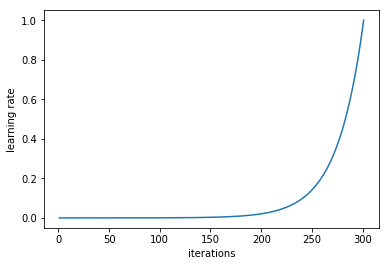

In [40]:
learn.sched.plot_lr()

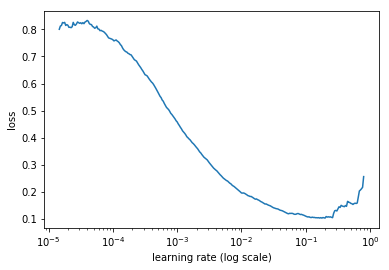

In [42]:
learn.sched.plot()

In [13]:
Xrays256.T

NameError: name 'Xrays256' is not defined

In [ ]:
pd.hist(output-sample_labels)

In [38]:
binary_labels = sample_labels.iloc[:,-1].values.reshape(-1,1)
multiclass_labels = sample_labels.iloc[:,-14:].values

binary_labels.shape, multiclass_labels.shape

((10000, 1), (10000, 14))

In [53]:
binary_labels = 1-binary_labels
binary_labels

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [149]:
import pomegranate
pomegranate.utils.enable_gpu()
print(pomegranate.utils.is_gpu_enabled())

True


In [24]:
import cupy
from cupy import cuda
cuda.Device().cublas_handle
import cupy as cp
cp.cuda.Device(0).use()
x_on_gpu0 = cp.array([1, 2, 3, 4, 5])
cp.cuda.Device(1).use()
x_on_gpu1 = cp.array([1, 2, 3, 4, 5])
x_on_gpu0.device, x_on_gpu1.device
x_on_gpu0,x_on_gpu1
x_on_gpu0+x_on_gpu1

ValueError: Array device must be same as the current device: array device = 0 while current = 1

In [5]:
%%time
import cupy
from cupy import cuda
cuda.Device().cublas_handle
import cupy as cp
cp.cuda.Device(0).use()
N=10000
x_on_gpu0 = cp.random.rand(N,N)
#x_on_gpu0
x_on_gpu0_inv=cp.linalg.inv(x_on_gpu0)
cp.dot(x_on_gpu0_inv,x_on_gpu0)==cp.eye(N)
#x_on_gpu0_inv
#np.allclose(cp.asarray(cp.dot(x_on_gpu0_inv,x_on_gpu0)),np.eye(N))


CPU times: user 1.64 s, sys: 284 ms, total: 1.92 s
Wall time: 1.91 s


In [6]:
%%time
import numpy as np
N=10000
x_on_gpu0 = np.random.rand(N,N)
#x_on_gpu0
x_on_gpu0_inv=np.linalg.inv(x_on_gpu0)
#np.allclose(np.dot(x_on_gpu0_inv,x_on_gpu0),np.eye(N))
np.dot(x_on_gpu0_inv,x_on_gpu0)==np.eye(N)
#x_on_gpu0_inv
#np.eye(N)

CPU times: user 9min 14s, sys: 2min 15s, total: 11min 29s
Wall time: 23.8 s


In [164]:
np.sum(np.genfromtxt('proteinGroups.txt',delimiter='\t'))

nan

In [87]:
#!conda install pomegranate
!pip install cupy

    100% |████████████████████████████████| 2.0MB 560kB/s 
    100% |████████████████████████████████| 81kB 5.4MB/s 
  Running setup.py bdist_wheel for cupy ... done
  Stored in directory: /home/notebook/.cache/pip/wheels/b2/6d/03/4864117caeebbd6483b1e521dc2467419351221d93ef8eb000
Successfully built cupy
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


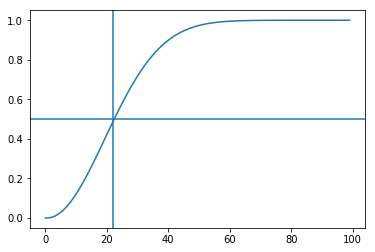

In [2]:
def birthProb(N):
    fac,div,day=1,1,354
    for i in range(N):
        fac*=(day-i)
        div*=day
        #print(day-i,fac,div)
    return 1.0-fac/div
probList=[birthProb(i) for i in list(range(100))]
import matplotlib.pyplot as plt
plt.plot(probList)
plt.axhline(0.5)
plt.axvline(22)
plt.show()

In [38]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xrays256, binary_labels, test_size = .2)

NameError: name 'Xrays256' is not defined

In [39]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=71, shuffle=True, random_state=42)
batches = [train for test, train  in kf.split(X_train, y_train)]
batches[0].shape

NameError: name 'X_train' is not defined

In [76]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
test_batches = [t_batch for _, t_batch  in kf.split(X_test, y_test)]
np.histogram(test_batches[9])

(array([22, 21, 17, 24, 17, 26, 15, 26, 18, 14]),
 array([  13. ,  211.3,  409.6,  607.9,  806.2, 1004.5, 1202.8, 1401.1,
        1599.4, 1797.7, 1996. ]))

In [71]:
X_train.shape,X_test.shape

((8000, 256, 256), (2000, 256, 256))

In [59]:
#graph
import tensorflow as tf
tf.reset_default_graph()
X = tf.placeholder(dtype = tf.float32,
                   shape = (None, 256, 256), #remember i resized image to 128x128 grayscale using .reshape(-1,128,128,1)
                   name = 'X')

y = tf.placeholder(dtype = tf.float32,
                   shape = (None),
                   name = 'y')

# Input Layer
input_layer = tf.reshape(X, [-1, 128, 128, 1])
                                                                        
# Convolutional Layer #1
out = tf.layers.conv2d(inputs=input_layer,filters=4,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Pooling Layer #1
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],##64 x 64, strides = 2 so our image is compressed from 128 --> 64
                                    strides=2)
# 2nd Convolutional Layer #2 and Pooling Layer #2
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# 2nd Pooling Layer    
out = tf.layers.max_pooling2d(inputs=out,
                                pool_size=[2, 2],#64x64 14 -- >7
                                strides=2)
# 3rd Convolutional Layer
out = tf.layers.conv2d(inputs=out,filters=8,
                         kernel_size=[2, 2],
                         padding="same",
                         activation=tf.nn.relu)
# Dense, dropout, dense Layer
out = tf.reshape(out, [-1, 64 * 64 * 8]) #FLATTEN LAYER
dense = tf.layers.dense(inputs=out, units=100, activation=tf.nn.relu) #FIRST DENSE LAYER
dropout = tf.layers.dropout(inputs=dense,
                            rate=0.2)#40% to zero DROPOUT LAYER
dense2 = tf.layers.dense(inputs=dropout, units=100, activation=tf.nn.relu) #SECOND DENSE LAYER

# Logits Layer
y_hat = tf.layers.dense(inputs=dense2, units=1, #will need to change this once I have more labels/diseases
                        activation = tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)#gives the loss 

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)#optimizes the loss fx with adam gradient descent

saver = tf.train.Saver()

In [ ]:
%%time
#execution phase

init = tf.global_variables_initializer()

test_err = []
train_err = []
pred = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50): #maybe add some minibatches so it converges faster
        for count, batch in enumerate(batches):
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_op,
                     feed_dict={X:X_batch, y:y_batch})
            print('epoch:{0}, batch{1}'.format(epoch, count), end='\r')
            
        train_loss = sess.run(loss, feed_dict={X:X_batch, y:y_batch})
        train_err.append(train_loss)
#         test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        
#         test_err.append(test_loss)
       
        print('epoch', epoch, train_loss) #no need for the 'epoch+1', just epoch will suffice
        
    saver.save(sess,'./128Xrays.ckpt')
    
    for batch in test_batches:
        pred.append(sess.run(y_hat, feed_dict={X:X_test[batch]}))

epoch 0 -1.1814491e-07
epoch 1 -1.1814491e-07
epoch 2 -1.1814491e-07
epoch 3 -1.1814491e-07
epoch 4 -1.1069432e-07
epoch 5 0.004914905
epoch 6 0.004765661
epoch 7 0.004608136
epoch 8 0.0015799273
epoch 9 0.001512259
epoch 10 0.0015789103
epoch 11 0.0017434859


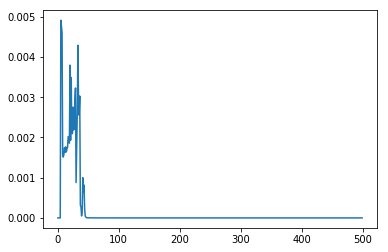

In [64]:
plt.plot(train_err)

In [66]:
predictions = [result for p in pred for result in p ]
predictions

[array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.], d

In [67]:
from  sklearn.metrics import accuracy_score,log_loss #ytrue ypred
log_loss(y_test, [[p[0],1-p[0]] for p in predictions])

34.41789067752848

In [68]:
np.round([p[0] for p in predictions])

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [69]:
# Compute confusion matrix
confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
cnf_matrix = confusion_matrix(y_test, np.round([p[0] for p in predictions]))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['No Findings', 'Abnormal Findings'],
                      normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'confusion_matrix' is not defined

In [68]:
z = np.array([[1, 2, 3, 4],
         [5, 6, 7, 8],
         [9, 10, 11, 12]])
z.shape

(3, 4)

In [94]:
z=z.reshape(-1,3,2)
z

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])

In [65]:
import matplotlib.pylab as plt
z=z.reshape(3,-1)
plt.imshow(z)

NameError: name 'z' is not defined

In [219]:
X=Variable(torch.Tensor(Xrays256[:,1,1].reshape(-1,1))).cuda()
y=Variable(torch.Tensor(Xrays256[:,1,2].reshape(-1,1))).cuda()
X, y

(Variable containing:
  0.1373
  0.2314
  0.0431
    ⋮    
  0.1922
  0.7765
  0.8118
 [torch.cuda.FloatTensor of size 10000x1 (GPU 0)], Variable containing:
  0.1020
  0.1961
  0.0431
    ⋮    
  0.1608
  0.7490
  0.7961
 [torch.cuda.FloatTensor of size 10000x1 (GPU 0)])

In [230]:
w=Variable(torch.Tensor(Xrays256[:,1,3].reshape(-1,1)), requires_grad=True).cuda()

In [242]:
y=X@(w.transpose(0,1))

In [243]:
y#.backward()

Variable containing:
 0.0113  0.0258  0.0059  ...   0.0205  0.1007  0.1071
 0.0191  0.0436  0.0100  ...   0.0345  0.1697  0.1806
 0.0036  0.0081  0.0019  ...   0.0064  0.0316  0.0337
          ...             ⋱             ...          
 0.0158  0.0362  0.0083  ...   0.0286  0.1409  0.1500
 0.0639  0.1462  0.0335  ...   0.1157  0.5694  0.6060
 0.0669  0.1528  0.0350  ...   0.1210  0.5953  0.6335
[torch.cuda.FloatTensor of size 10000x10000 (GPU 0)]

In [244]:
w.grad.data.zero_()

AttributeError: 'NoneType' object has no attribute 'data'

In [246]:
!conda install pyro

Fetching package metadata ...An unexpected error has occurred.
Please consider posting the following information to the
conda GitHub issue tracker at:

    https://github.com/conda/conda/issues



Current conda install:

               platform : linux-64
          conda version : 4.3.34
       conda is private : False
      conda-env version : 4.3.34
    conda-build version : not installed
         python version : 3.6.4.final.0
       requests version : 2.18.4
       root environment : /opt/conda  (writable)
    default environment : /opt/conda
       envs directories : /opt/conda/envs
                          /home/jovyan/.conda/envs
          package cache : /opt/conda/pkgs
                          /home/jovyan/.conda/pkgs
           channel URLs : https://conda.anaconda.org/conda-forge/linux-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://repo.continuum.io/pkgs/main/linux-64
                          https://repo.conti

In [250]:
import pyro
from pyro.distributions import Bernoulli, Normal  # noqa: F401
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam

ModuleNotFoundError: No module named 'pyro'

In [220]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        self.linear = nn.Linear(input_dim, output_dim,bias=True).cuda()
    def forward(self, x):
        out = self.linear(x)
        return out

In [221]:
input_dim = 1
output_dim = 1
l_rate = 0.01
model = LinearRegressionModel(input_dim,output_dim)
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate)

In [223]:
epochs = 100
for epoch in range(epochs):
    epoch +=1
    optimiser.zero_grad()
    outputs = model.forward(X)
    loss = criterion(outputs, y)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

epoch 1, loss 0.01758129894733429
epoch 2, loss 0.01697053574025631
epoch 3, loss 0.01638472080230713
epoch 4, loss 0.015822838991880417
epoch 5, loss 0.015283907763659954
epoch 6, loss 0.014766992069780827
epoch 7, loss 0.014271188527345657
epoch 8, loss 0.013795639388263226
epoch 9, loss 0.013339509256184101
epoch 10, loss 0.012902011163532734
epoch 11, loss 0.012482378631830215
epoch 12, loss 0.012079882435500622
epoch 13, loss 0.011693825013935566
epoch 14, loss 0.011323531158268452
epoch 15, loss 0.01096835732460022
epoch 16, loss 0.010627685114741325
epoch 17, loss 0.010300924070179462
epoch 18, loss 0.009987503290176392
epoch 19, loss 0.009686878882348537
epoch 20, loss 0.009398524649441242
epoch 21, loss 0.009121940471231937
epoch 22, loss 0.008856646716594696
epoch 23, loss 0.008602181449532509
epoch 24, loss 0.008358102291822433
epoch 25, loss 0.00812398362904787
epoch 26, loss 0.007899417541921139
epoch 27, loss 0.007684016600251198
epoch 28, loss 0.007477403152734041
epoch 

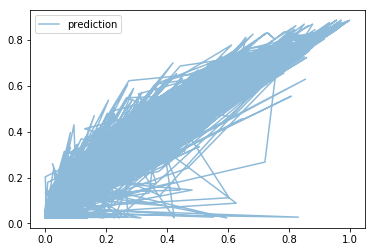

OrderedDict([('linear.weight', 
 0.8614
[torch.cuda.FloatTensor of size 1x1 (GPU 0)]
), ('linear.bias', 
1.00000e-02 *
  2.4016
[torch.cuda.FloatTensor of size 1 (GPU 0)]
)])


In [224]:
predicted =model.forward(X).cpu().data.numpy()
#plt.plot(X, y, 'i', label = 'from data', alpha = .5)
plt.plot(y.cpu().data.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())